
# Portuguese Bank Telemarketing Analytics

# Table of Contents

#  Project Background
 
1.Data Cleaning

2.Exploratory Data Analysis

3.Data Visualization

4.Machine Learning: Classification

5.Machine Learnine:regression

 Conclusion & Recommendations

# Part 1.Project Background
Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

# Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans.

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers.

In [2]:
pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install ydata_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Portugese bank data.csv') #loading the datasets
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0             5191   no  
1             5191   no  
2             5191   no  
3             5191   no  
4             5191   no  
...            ...  ...  
41183         4964  yes  
41184         4964   no  
41185         4964   no  
41186         4964  yes  
41187         4964   no  

[41188 rows x 21 columns]

# BASIC CHECKS

In [5]:
print(data.describe())
print(data.info())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.019010  
std        1.570960        0.578840       4.628198    

In [6]:
data.head()   # showing first 5 rows and columns

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857         5191  no  
1          93.994          -36.4      4.857         5191  no  
2          93.994          -36.4      4.857         5191  no  
3          93.994          -36.4      4.857         5191  no  
4          93.994          -36.4      4.857         5191  no  

[5 rows x 21 columns]

In [7]:
# This all columns are not important that's why we are going to drop mentioned columns

data.drop(['contact','month','day_of_week','pdays','emp.var.rate','euribor3m','nr.employed'],axis=1,inplace=True)
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

       duration  campaign  previous     poutcome  cons.price.idx  \
0           261         1         0  nonexistent          93.994   
1           149         1         0  nonexistent          93.994   
2           226         1         0  nonexistent          93.994   
3           151         1         0  nonexistent          93.994   
4           307         1         0  nonexistent          93.994   
...         ...       ...       ...          ...             ...   
41183       334         1         0  nonexistent          94.767   
41184       383         1         0  nonexistent          94.767   
41185       189         2         0  nonexistent          94.767   
41186       442         1         0  nonexistent          94.767   
41187       239         3         1      failure          94.767   

       cons.conf.idx    y  
0              -36.4   no  
1              -36.4   no  
2              -36.4   no  
3              -36.4   no  
4              -36.4   no  
...              ...  ...  
41183          -50.8  yes  
41184          -50.8   no  
41185          -50.8   no  
41186          -50.8  yes  
41187          -50.8   no  

[41188 rows x 14 columns]

In [8]:
data.tail()   # showing last 5 rows and columns

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

       duration  campaign  previous     poutcome  cons.price.idx  \
41183       334         1         0  nonexistent          94.767   
41184       383         1         0  nonexistent          94.767   
41185       189         2         0  nonexistent          94.767   
41186       442         1         0  nonexistent          94.767   
41187       239         3         1      failure          94.767   

       cons.conf.idx    y  
41183          -50.8  yes  
41184          -50.8   no  
41185          -50.8   no  
41186          -50.8  yes  
41187          -50.8   no

In [9]:
data.shape  # it showing number of rows and columns and data 

(41188, 14)

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

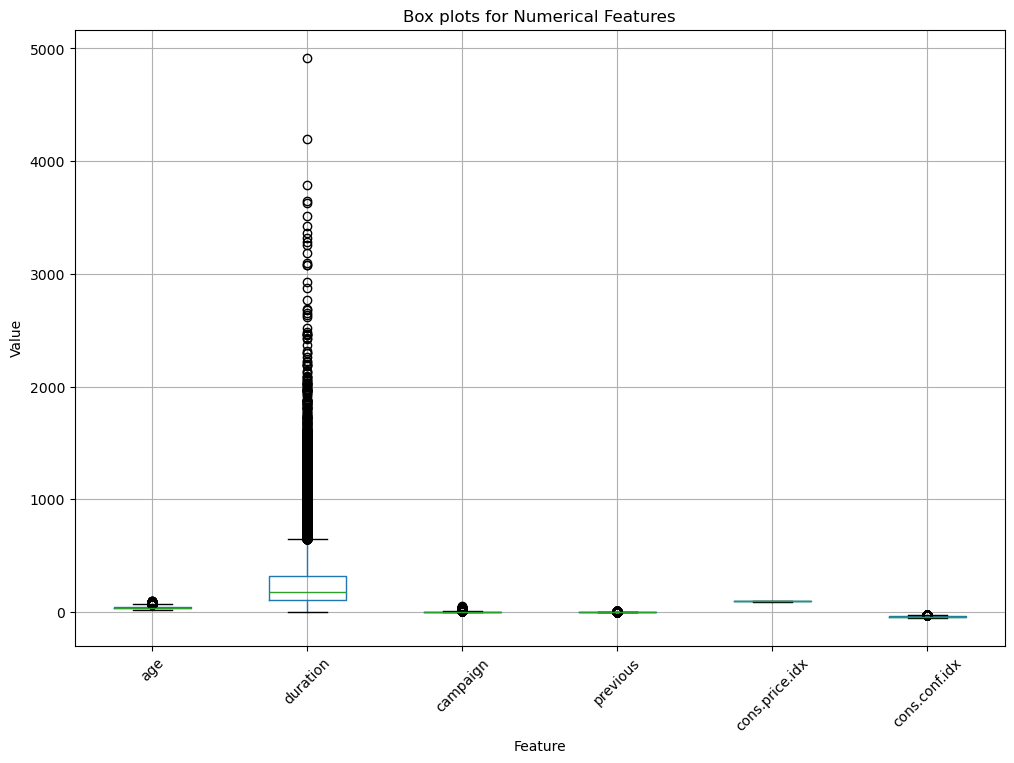

In [11]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

# Create box plots for all numerical features
plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

# Outliers

- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.
- An outlier is a single data point that goes far outside the average value of a group of statistics.
- Outliers may be exceptions that stand outside individual samples of populations as well.
- In a more general context, an outlier is an individual that is markedly different from the norm in some respect.

In [12]:
data.info()   # it showing information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  object 
 11  cons.price.idx  41188 non-null  float64
 12  cons.conf.idx   41188 non-null  float64
 13  y               41188 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 4.4+ MB


In [13]:
data.describe()   # it showing statistics informations

age      duration      campaign      previous  cons.price.idx  \
count  41188.00000  41188.000000  41188.000000  41188.000000    41188.000000   
mean      40.02406    258.285010      2.567593      0.172963       93.575664   
std       10.42125    259.279249      2.770014      0.494901        0.578840   
min       17.00000      0.000000      1.000000      0.000000       92.201000   
25%       32.00000    102.000000      1.000000      0.000000       93.075000   
50%       38.00000    180.000000      2.000000      0.000000       93.749000   
75%       47.00000    319.000000      3.000000      0.000000       93.994000   
max       98.00000   4918.000000     56.000000      7.000000       94.767000   

       cons.conf.idx  
count   41188.000000  
mean      -40.502600  
std         4.628198  
min       -50.800000  
25%       -42.700000  
50%       -41.800000  
75%       -36.400000  
max       -26.900000

# EDA

In [14]:
profile=ProfileReport(data,title="EDA",explorative=False)

In [15]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation matrix

<Axes: >

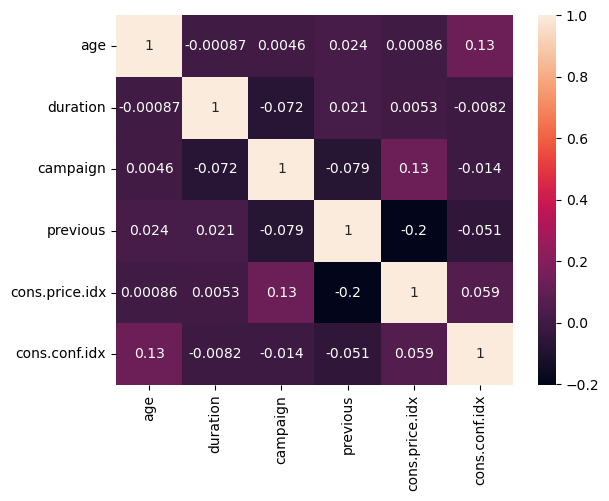

In [16]:
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr(),annot=True)

In [17]:
 np.where(data.select_dtypes(include=['int', 'float']).corr()>0.9)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([0, 1, 2, 3, 4, 5], dtype=int64))

- A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.
- The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0
a neutral relationship and -1 a not strong relationship.
- We can also set up our own threshold values based on the datasets.

# DATA PREPROCESSING

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.
- It is the first and crucial step while creating a machine learning model.
- When creating a machine learning project, it is not always a case that we come across the clean and formatted data.

In [18]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')

### These are continuous columns so we will use standard scaler. But we can also divide age by 100 and that can be the transformation for age. Trasformation on age is just to see how we can apply custom transformations without using pre built scikit-learn functions.


In [19]:
data[['age','duration','campaign','previous','cons.price.idx',
       'cons.conf.idx']]

age  duration  campaign  previous  cons.price.idx  cons.conf.idx
0       56       261         1         0          93.994          -36.4
1       57       149         1         0          93.994          -36.4
2       37       226         1         0          93.994          -36.4
3       40       151         1         0          93.994          -36.4
4       56       307         1         0          93.994          -36.4
...    ...       ...       ...       ...             ...            ...
41183   73       334         1         0          94.767          -50.8
41184   46       383         1         0          94.767          -50.8
41185   56       189         2         0          94.767          -50.8
41186   44       442         1         0          94.767          -50.8
41187   74       239         3         1          94.767          -50.8

[41188 rows x 6 columns]

In [20]:
data.select_dtypes(include=['int', 'float']).columns

Index(['age', 'duration', 'campaign', 'previous', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object')

In [21]:
data.campaign.value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [22]:
data.previous.value_counts()

previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [23]:
data[['cons.price.idx']].value_counts() 

cons.price.idx
93.994            7763
93.918            6685
92.893            5794
93.444            5175
94.465            4374
93.200            3616
93.075            2458
92.201             770
92.963             715
92.431             447
92.649             357
94.215             311
94.199             303
92.843             282
92.379             267
93.369             264
94.027             233
94.055             229
93.876             212
94.601             204
92.469             178
93.749             174
92.713             172
94.767             128
93.798              67
92.756              10
Name: count, dtype: int64

In [24]:
data[['cons.conf.idx']].value_counts()           

cons.conf.idx
-36.4            7763
-42.7            6685
-46.2            5794
-36.1            5175
-41.8            4374
-42.0            3616
-47.1            2458
-31.4             770
-40.8             715
-26.9             447
-30.1             357
-40.3             311
-37.5             303
-50.0             282
-29.8             267
-34.8             264
-38.3             233
-39.8             229
-40.0             212
-49.5             204
-33.6             178
-34.6             174
-33.0             172
-50.8             128
-40.4              67
-45.9              10
Name: count, dtype: int64

# USING ONE HOT ENCODING

In [25]:
data.marital.value_counts()


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

- We will be using OHE for this column.

- One-hot encoding is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories have no inherent order or relationship. The idea behind one-hot encoding is to represent each category as a binary vector. Here’s how it works:

- For each category in a categorical column, a new binary column is created.

- The binary column will have a value of 1 if the class is present, else it will be zero.

In [26]:
# lets find the top 10 most frequently categories for the variable 'campaign'
data['campaign'].value_counts().sort_values(ascending=False).head(20)

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
Name: count, dtype: int64

# Function Transformer

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List of columns to encode
columns_to_encode = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx']

# Check existing columns in the DataFrame
print("Available columns in dataset:", data.columns)

# Filter only available columns from the list
existing_columns = [col for col in columns_to_encode if col in data.columns]

# Apply scaling only if valid columns exist
if existing_columns:
    scaler = StandardScaler()
    data[existing_columns] = scaler.fit_transform(data[existing_columns])
    print("Scaling applied successfully! 🚀")
else:
    print("None of the specified columns are found in the dataset!")

# Display first 5 rows
print(data.head())


Available columns in dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')
Scaling applied successfully! 🚀
        age        job  marital    education  default housing loan  duration  \
0  1.533034  housemaid  married     basic.4y       no      no   no  0.010471   
1  1.628993   services  married  high.school  unknown      no   no -0.421501   
2 -0.290186   services  married  high.school       no     yes   no -0.124520   
3 -0.002309     admin.  married     basic.6y       no      no   no -0.413787   
4  1.533034   services  married  high.school       no      no  yes  0.187888   

   campaign  previous     poutcome  cons.price.idx  cons.conf.idx   y  
0 -0.565922 -0.349494  nonexistent        0.722722       0.886447  no  
1 -0.565922 -0.349494  nonexistent        0.722722       0.886447  no  
2 -0.565922 -0.349494  nonexistent       

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
data['marital'] = encoder.fit_transform(data['marital'])

# Display the result
print(data[['marital']]) 

       marital
0            1
1            1
2            1
3            1
4            1
...        ...
41183        1
41184        1
41185        1
41186        1
41187        1

[41188 rows x 1 columns]


In [29]:
data

age          job  marital            education  default housing  \
0      1.533034    housemaid        1             basic.4y       no      no   
1      1.628993     services        1          high.school  unknown      no   
2     -0.290186     services        1          high.school       no     yes   
3     -0.002309       admin.        1             basic.6y       no      no   
4      1.533034     services        1          high.school       no      no   
...         ...          ...      ...                  ...      ...     ...   
41183  3.164336      retired        1  professional.course       no     yes   
41184  0.573445  blue-collar        1  professional.course       no      no   
41185  1.533034      retired        1    university.degree       no     yes   
41186  0.381527   technician        1  professional.course       no      no   
41187  3.260295      retired        1  professional.course       no     yes   

      loan  duration  campaign  previous     poutcome  cons.price.idx  \
0       no  0.010471 -0.565922 -0.349494  nonexistent        0.722722   
1       no -0.421501 -0.565922 -0.349494  nonexistent        0.722722   
2       no -0.124520 -0.565922 -0.349494  nonexistent        0.722722   
3       no -0.413787 -0.565922 -0.349494  nonexistent        0.722722   
4      yes  0.187888 -0.565922 -0.349494  nonexistent        0.722722   
...    ...       ...       ...       ...          ...             ...   
41183   no  0.292025 -0.565922 -0.349494  nonexistent        2.058168   
41184   no  0.481012 -0.565922 -0.349494  nonexistent        2.058168   
41185   no -0.267225 -0.204909 -0.349494  nonexistent        2.058168   
41186   no  0.708569 -0.565922 -0.349494  nonexistent        2.058168   
41187   no -0.074380  0.156105  1.671136      failure        2.058168   

       cons.conf.idx    y  
0           0.886447   no  
1           0.886447   no  
2           0.886447   no  
3           0.886447   no  
4           0.886447   no  
...              ...  ...  
41183      -2.224953  yes  
41184      -2.224953   no  
41185      -2.224953   no  
41186      -2.224953  yes  
41187      -2.224953   no  

[41188 rows x 14 columns]

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
data['y'] = encoder.fit_transform(data['y'])

# Display the result
print(data[['y']])

       y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41188 rows x 1 columns]


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is already defined
# List of columns to encode
columns_to_encode = ['default', 'housing', 'loan','poutcome','job','education']

# Check existing columns in the DataFrame
print("Available columns in dataset:", data.columns)

# Filter only available columns from the list
existing_columns = [col for col in columns_to_encode if col in data.columns]

# Apply encoding only if valid columns exist
if existing_columns:
    encoder = LabelEncoder()  # Create an instance of LabelEncoder
    for col in existing_columns:
        data[col] = encoder.fit_transform(data[col])  # Encode column-by-column
    print("Encoding applied successfully! 🚀")
else:
    print("None of the specified columns are found in the dataset!")

# Display first 5 rows
print(data.head())


Available columns in dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'y'],
      dtype='object')
Encoding applied successfully! 🚀
        age  job  marital  education  default  housing  loan  duration  \
0  1.533034    3        1          0        0        0     0  0.010471   
1  1.628993    7        1          3        1        0     0 -0.421501   
2 -0.290186    7        1          3        0        2     0 -0.124520   
3 -0.002309    0        1          1        0        0     0 -0.413787   
4  1.533034    7        1          3        0        0     2  0.187888   

   campaign  previous  poutcome  cons.price.idx  cons.conf.idx  y  
0 -0.565922 -0.349494         1        0.722722       0.886447  0  
1 -0.565922 -0.349494         1        0.722722       0.886447  0  
2 -0.565922 -0.349494         1        0.722722       0.886447  0  
3 -0.565922 -0.34949

In [69]:
import seaborn as sns

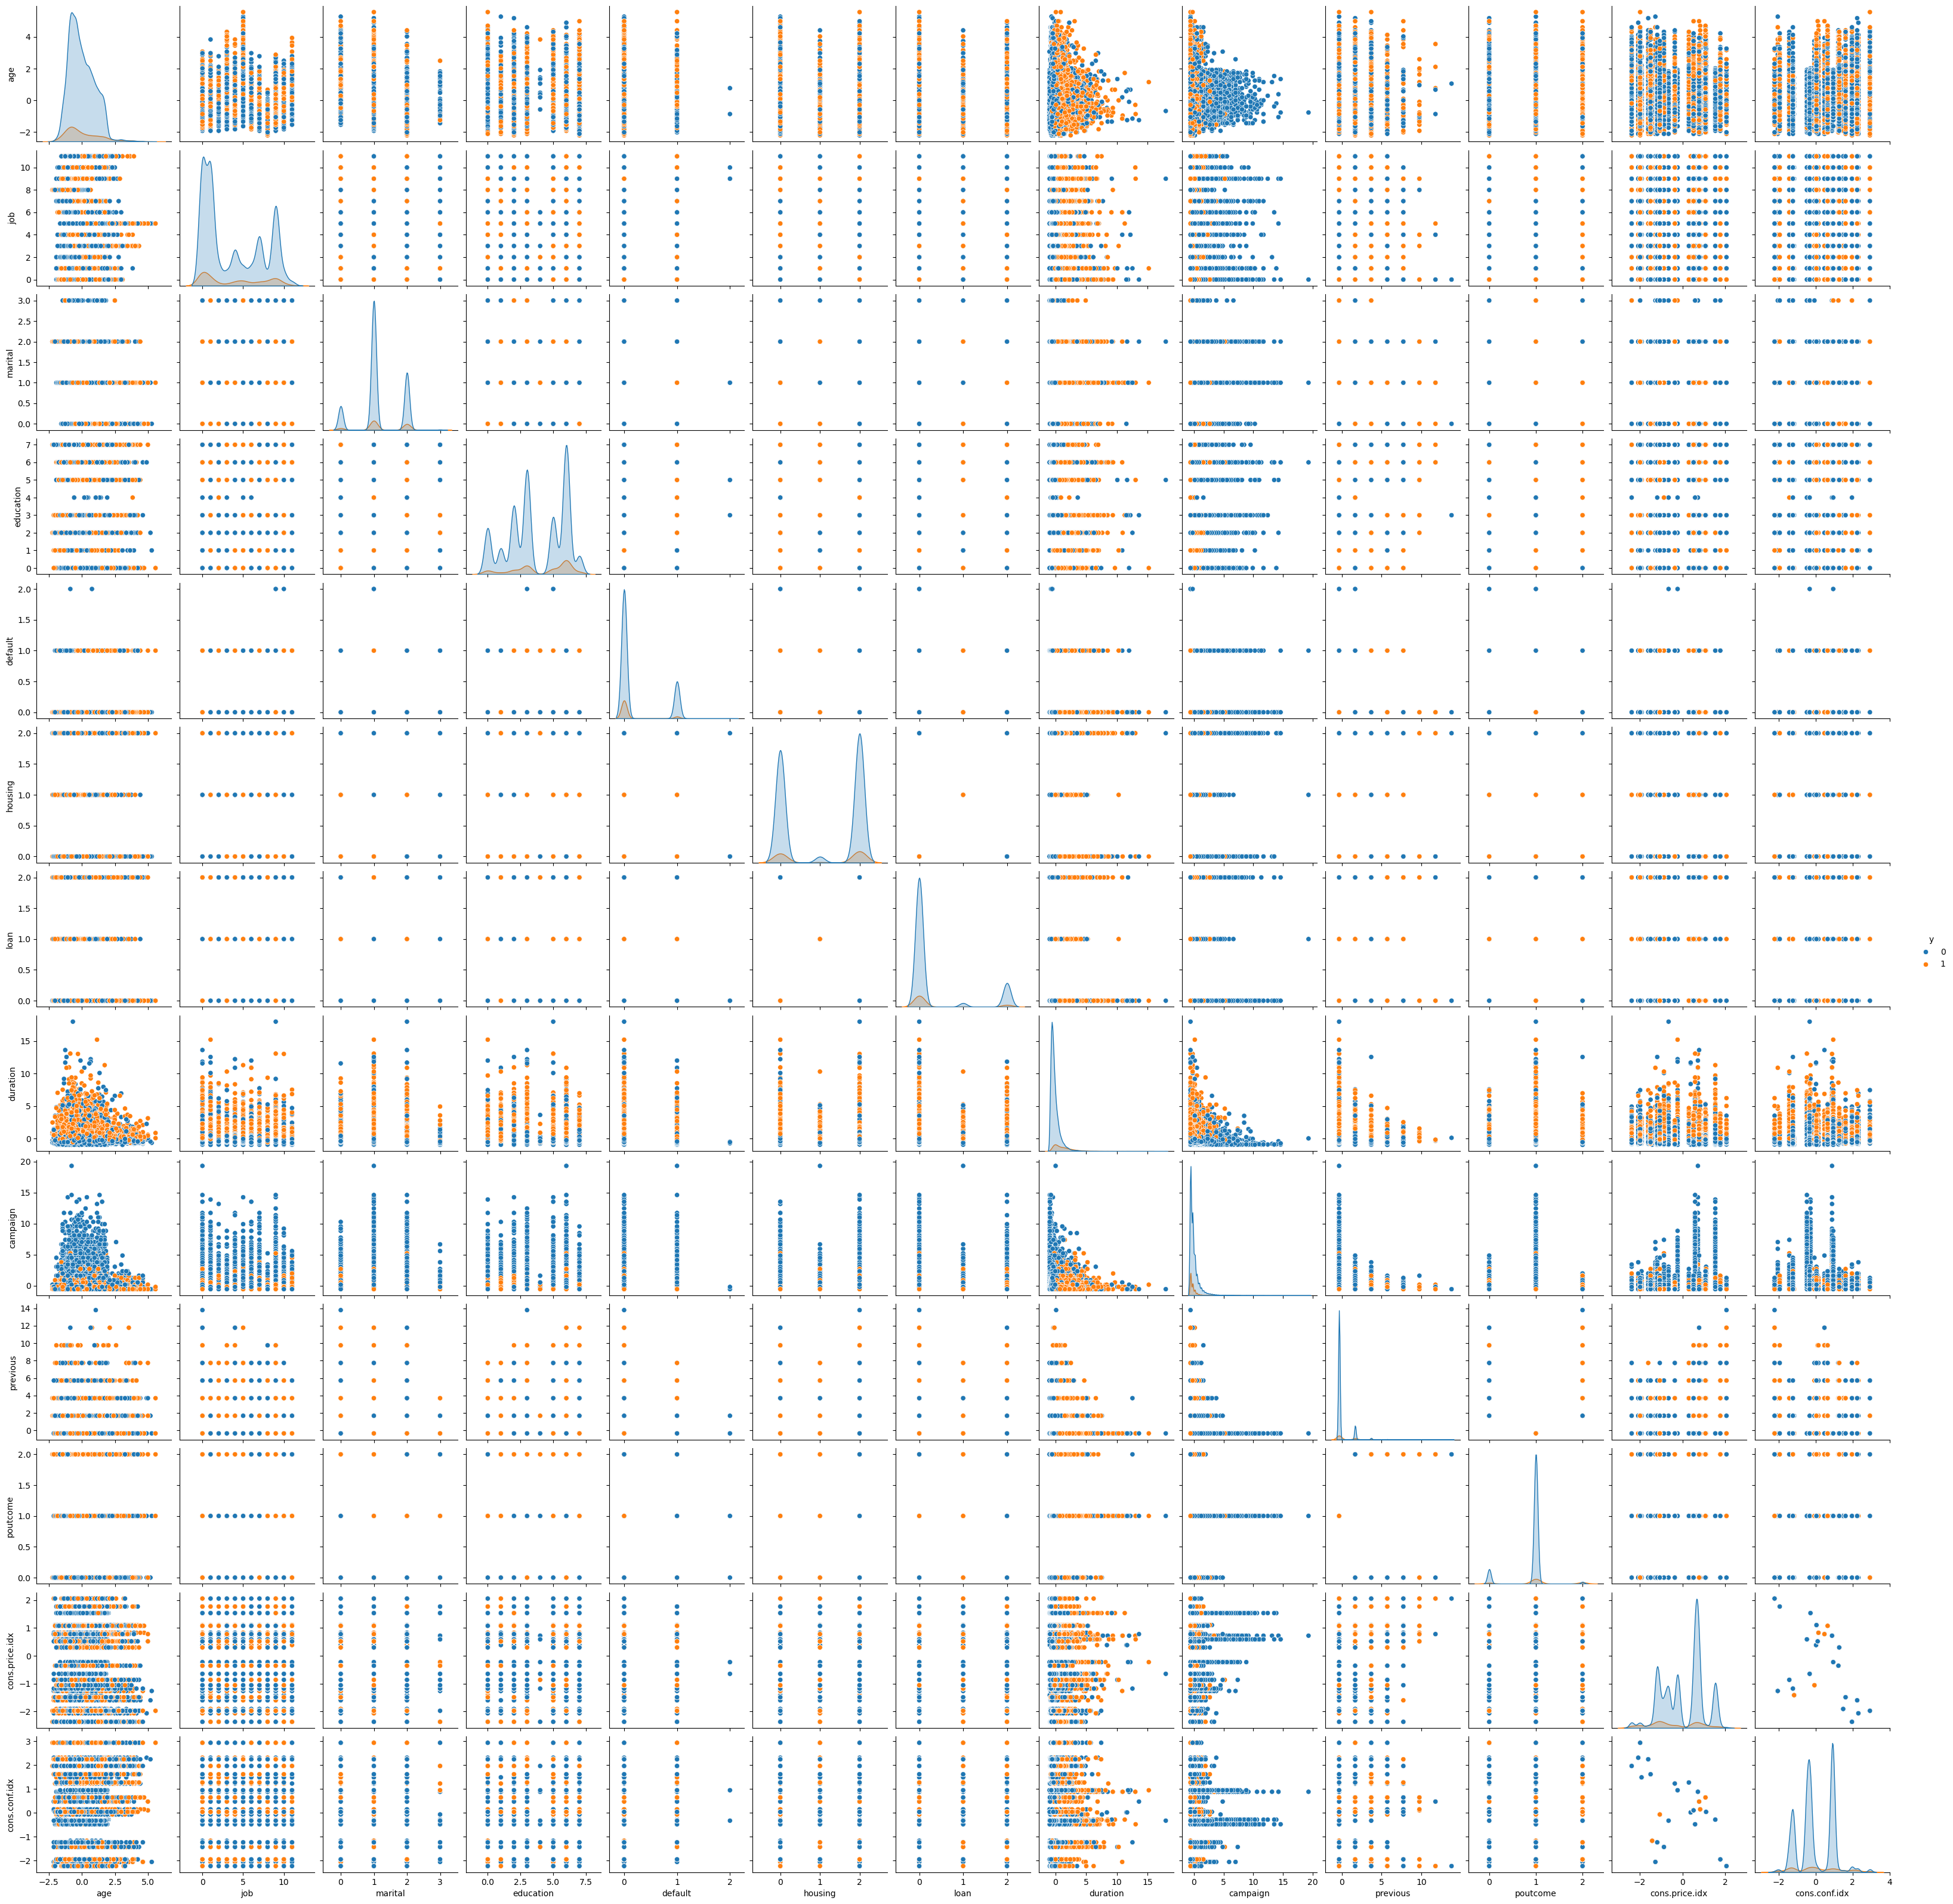

In [68]:
sns.pairplot(data,hue='y')

In [ ]:
# In this PairPlot We identified that Linear Regression is not Suitable so we used Logistic Regression,Knn algorithm,Decision Tree,Random Forest,SVm,XG Boosting 

In [ ]:
X=data.drop(['y'],axis=1)
Y=data['y']


In [33]:
X

age  job  marital  education  default  housing  loan  duration  \
0      1.533034    3        1          0        0        0     0  0.010471   
1      1.628993    7        1          3        1        0     0 -0.421501   
2     -0.290186    7        1          3        0        2     0 -0.124520   
3     -0.002309    0        1          1        0        0     0 -0.413787   
4      1.533034    7        1          3        0        0     2  0.187888   
...         ...  ...      ...        ...      ...      ...   ...       ...   
41183  3.164336    5        1          5        0        2     0  0.292025   
41184  0.573445    1        1          5        0        0     0  0.481012   
41185  1.533034    5        1          6        0        2     0 -0.267225   
41186  0.381527    9        1          5        0        0     0  0.708569   
41187  3.260295    5        1          5        0        2     0 -0.074380   

       campaign  previous  poutcome  cons.price.idx  cons.conf.idx  
0     -0.565922 -0.349494         1        0.722722       0.886447  
1     -0.565922 -0.349494         1        0.722722       0.886447  
2     -0.565922 -0.349494         1        0.722722       0.886447  
3     -0.565922 -0.349494         1        0.722722       0.886447  
4     -0.565922 -0.349494         1        0.722722       0.886447  
...         ...       ...       ...             ...            ...  
41183 -0.565922 -0.349494         1        2.058168      -2.224953  
41184 -0.565922 -0.349494         1        2.058168      -2.224953  
41185 -0.204909 -0.349494         1        2.058168      -2.224953  
41186 -0.565922 -0.349494         1        2.058168      -2.224953  
41187  0.156105  1.671136         0        2.058168      -2.224953  

[41188 rows x 13 columns]

In [34]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split


In [36]:
# Training will be based on 70% of data
X_train , X_test , Y_train , Y_test = train_test_split (X ,Y, test_size = 0.3 , random_state = 0,shuffle=True)

In [37]:
from sklearn import metrics

# logistic regression
## target variables of a dataset are discreate hence we are using multiclass logistic regression model



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'sag',  max_iter = 10000)
lr.fit(X_train,Y_train)
Y_predict=lr.predict(X_test)



Confusion Matrix:
[[10725   244]
 [  944   444]]


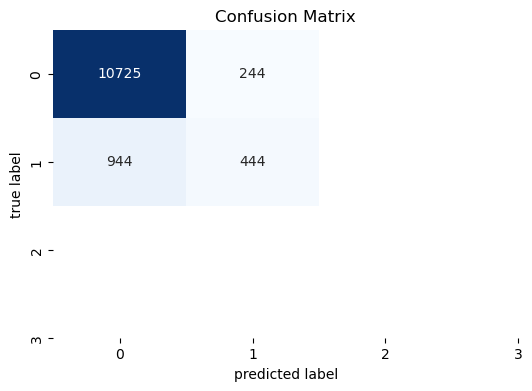

In [40]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_predict)
print("\nConfusion Matrix:\n%s"%confusion_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False,xticklabels=['0','1','2','3'],yticklabels=['0','1','2','3'])
plt.title("Confusion Matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()

In [41]:
classification_report=metrics.classification_report(Y_test,Y_predict,output_dict=True)
print("\nclassification report:\ns"+str(metrics.classification_report(Y_test,Y_predict)))
cr=pd.DataFrame(classification_report).transpose()
cr


classification report:
s              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10969
           1       0.65      0.32      0.43      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.65      0.69     12357
weighted avg       0.89      0.90      0.89     12357



precision    recall  f1-score      support
0              0.919102  0.977755  0.947522  10969.00000
1              0.645349  0.319885  0.427746   1388.00000
accuracy       0.903860  0.903860  0.903860      0.90386
macro avg      0.782225  0.648820  0.687634  12357.00000
weighted avg   0.888353  0.903860  0.889138  12357.00000

In [42]:
lr_acc=accuracy_score(Y_predict,Y_test)
print("Train set accuracy:"+str(lr_acc*100))


Train set accuracy:90.38601602330662


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
Dt = DecisionTreeClassifier (random_state=101)
Dt.fit (X_train , Y_train)
Y_pred = Dt.predict (X_test)

[[10226   743]
 [  676   712]]


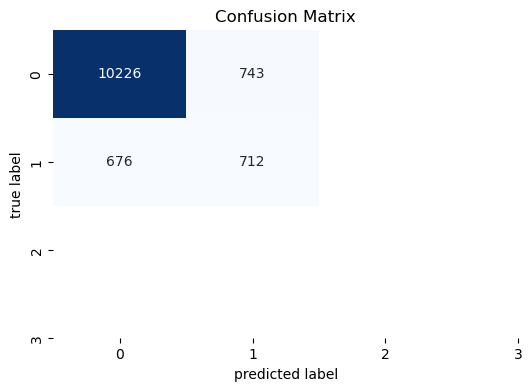

In [45]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False,xticklabels=['0','1','2','3'],yticklabels=['0','1','2','3'])
plt.title("Confusion Matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()


In [46]:
classification_report=metrics.classification_report(Y_test,Y_pred,output_dict=True)
print("\nclasssification report:\ns"+str(metrics.classification_report(Y_test,Y_pred)))
dt=pd.DataFrame(classification_report).transpose()
dt


classsification report:
s              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10969
           1       0.49      0.51      0.50      1388

    accuracy                           0.89     12357
   macro avg       0.71      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



precision    recall  f1-score       support
0              0.937993  0.932264  0.935120  10969.000000
1              0.489347  0.512968  0.500879   1388.000000
accuracy       0.885166  0.885166  0.885166      0.885166
macro avg      0.713670  0.722616  0.717999  12357.000000
weighted avg   0.887599  0.885166  0.886344  12357.000000

In [47]:
Dt_acc=metrics.accuracy_score(Y_test,Y_pred)
print("Train set accuracy:"+str(Dt_acc*100))

Train set accuracy:88.51663025006069


# Random forest


## Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [49]:
rf = RandomForestClassifier(n_estimators = 100, random_state=101) 
rf_model=rf.fit(X_train,Y_train)
y_predicion=rf.predict(X_test)

[[10623   346]
 [  746   642]]


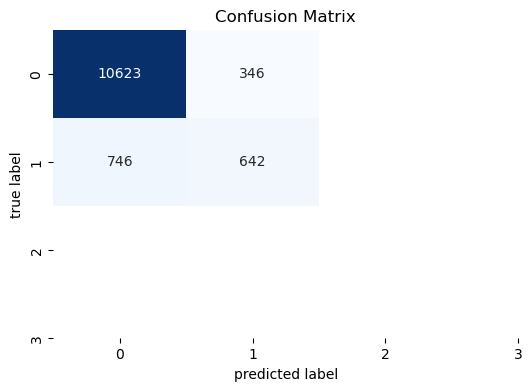

In [50]:
confusion_matrix=metrics.confusion_matrix(Y_test,y_predicion)
print(confusion_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False,xticklabels=['0','1','2','3'],yticklabels=['0','1','2','3'])
plt.title("Confusion Matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()

In [51]:
classification_report=metrics.classification_report(Y_test,y_predicion,output_dict=True)
print("\nclasssification report:\ns"+str(metrics.classification_report(Y_test,y_predicion)))
rf=pd.DataFrame(classification_report).transpose()
rf


classsification report:
s              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10969
           1       0.65      0.46      0.54      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



precision    recall  f1-score       support
0              0.934383  0.968457  0.951115  10969.000000
1              0.649798  0.462536  0.540404   1388.000000
accuracy       0.911629  0.911629  0.911629      0.911629
macro avg      0.792090  0.715496  0.745759  12357.000000
weighted avg   0.902417  0.911629  0.904982  12357.000000

In [52]:
rf_acc=metrics.accuracy_score(Y_test,y_predicion)
print("Train set accuracy:"+str(rf_acc*100))

Train set accuracy:91.16290361738287


# SVM

In [53]:
from sklearn.svm import SVC


In [54]:
svc=SVC (kernel="linear")

In [55]:
svc_model=svc.fit(X_train,Y_train)


In [56]:
y_pre=svc.predict(X_test)


[[10804   165]
 [ 1119   269]]


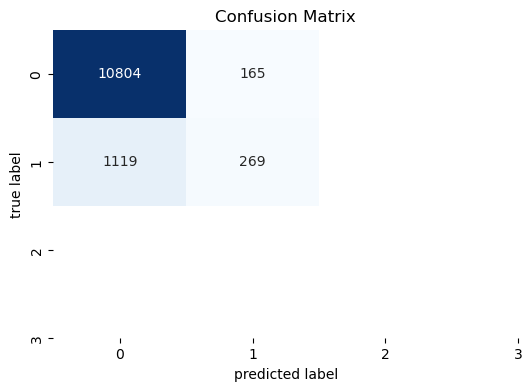

In [57]:
confusion_matrix=metrics.confusion_matrix(Y_test,y_pre)
print(confusion_matrix)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False,xticklabels=['0','1','2','3'],yticklabels=['0','1','2','3'])
plt.title("Confusion Matrix")
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show()

In [58]:
classification_report=metrics.classification_report(Y_test,y_pre,output_dict=True)
print("\nclasssification report:\ns"+str(metrics.classification_report(Y_test,y_pre)))
svm=pd.DataFrame(classification_report).transpose()
svm



classsification report:
s              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10969
           1       0.62      0.19      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.76      0.59      0.62     12357
weighted avg       0.87      0.90      0.87     12357



precision    recall  f1-score       support
0              0.906148  0.984958  0.943911  10969.000000
1              0.619816  0.193804  0.295280   1388.000000
accuracy       0.896091  0.896091  0.896091      0.896091
macro avg      0.762982  0.589381  0.619595  12357.000000
weighted avg   0.873986  0.896091  0.871053  12357.000000

In [59]:
svm_acc=metrics.accuracy_score(Y_test,y_pre)
print("Train set accuracy:"+str(svm_acc*100))

Train set accuracy:89.6091284292304


In [60]:
!pip install xgboost


In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode 'marital' column
le = LabelEncoder()
X_train['marital'] = le.fit_transform(X_train['marital'])
X_test['marital'] = le.transform(X_test['marital'])


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode Target Variable (Convert 'yes' to 1 and 'no' to 0)
le = LabelEncoder()
Y = le.fit_transform(Y)  # Convert ['yes', 'no'] → [1, 0]

# Check dataset shape before splitting
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# Ensure no shape mismatches
if len(X) != len(Y):
    raise ValueError(f"Mismatch in X and Y sizes: {len(X)} vs {len(Y)}")

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(Y_test, y_pred),
        "Precision": precision_score(Y_test, y_pred, pos_label=1),  # Change pos_label to 1
        "Recall": recall_score(Y_test, y_pred, pos_label=1),  # Change pos_label to 1
        "AUC-ROC": roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="AUC-ROC", ascending=False))


Shape of X: (41188, 13)
Shape of Y: (41188,)
                 Model  Accuracy  Precision    Recall   AUC-ROC
3              XGBoost  0.915149   0.648508  0.538793  0.945847
2        Random Forest  0.915149   0.665224  0.496767  0.943910
0  Logistic Regression  0.906288   0.675676  0.323276  0.901825
1        Decision Tree  0.885530   0.492292  0.516164  0.724293


In [64]:
import matplotlib.pyplot as plt

# CONCLUSION

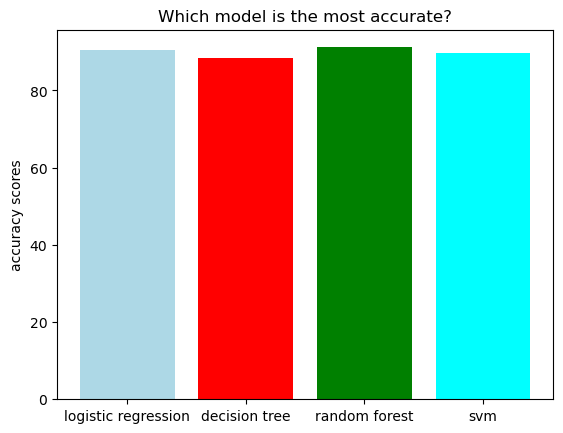

In [65]:
models = ['logistic regression','decision tree','random forest','svm']
acc_scores = [90.38,88.51,91.16,89.60]

plt.bar(models, acc_scores, color=['lightblue', 'red', 'green', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

**Challenges Faced in the Portuguese Bank Marketing Project**

### **1. Data Imbalance**
- The target variable (‘y’) was highly imbalanced, with more ‘no’ responses than ‘yes’. This affected model performance and required techniques such as oversampling (SMOTE) or adjusting class weights.

### **2. Feature Engineering Challenges**
- Encoding categorical variables without causing dimensionality explosion was a challenge, which was resolved using One-Hot Encoding with `handle_unknown='ignore'`.

### **3. Model Selection & Performance Optimization**
- Logistic Regression initially struggled with non-linearity in the data, requiring more advanced models like Random Forest and XGBoost for better performance.

### **4. Business Interpretation & Insights Generation**
- Understanding how each feature impacted customer decisions was crucial for marketing recommendations.
- Feature importance analysis using SHAP values helped interpret why certain models performed well and which attributes influenced customer subscription.





# CONCLUSION

**Business Insights and Recommendations for Portuguese Bank Marketing**

### **1. Customer Analysis & Key Findings**
- **Age Group Insights:** Customers between **30-50 years old** are more likely to subscribe to term deposits.
- **Job Influence:** The top professions subscribing to term deposits are **management, self-employed, and technicians**.
- **Marital Status:** **Single and divorced customers** are more responsive compared to married customers.
- **Loan & Credit Influence:** Customers **without personal loans and credit defaults** show higher subscription rates.

### **2. Marketing Strategy Optimization**
- **Best Contact Timing:** Campaigns during **May, August, and October** have higher success rates.
- **Contact Method Preference:** Customers contacted via **cellular** respond better than those reached via telephone.
- **Campaign Frequency:** Customers contacted **less than 3 times** show better engagement. Over-contacting leads to lower response rates.

### **3. Improving Future Campaigns**
- **Targeting Strategy:**
  - Focus on customers aged **30-50** with stable jobs (management, self-employed, technicians).
  - Prioritize **single and divorced customers** over married ones.
  - Avoid customers who have **existing personal loans** or **credit defaults**.
- **Reducing Unnecessary Calls:**
  - Stop calling customers who have been contacted **more than 3 times** without success.
  - Prioritize calls during **peak response months (May, August, October)**.
- **Enhancing Customer Engagement:**
  - Improve marketing messages for high-value customer segments.
  - Offer personalized promotions for customers more likely to subscribe.

### **4. Suggested Action Plan**
1. **Refine Target Audience** → Focus on the most promising customer segments.
2. **Optimize Contact Strategy** → Use cellular over telephone and reduce excessive calls.
3. **Enhance Campaign Timing** → Concentrate marketing efforts during peak months.
4. **Personalized Offers** → Provide incentives for high-potential customers to convert.

### **Conclusion**
By implementing these insights, the bank can **improve conversion rates, reduce operational costs, and increase customer satisfaction**. These strategies will help maximize marketing ROI and optimize future campaigns.

